In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [34]:
df=pd.read_csv('winequality.csv',sep=';')
df.head()
df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[1 2 0]


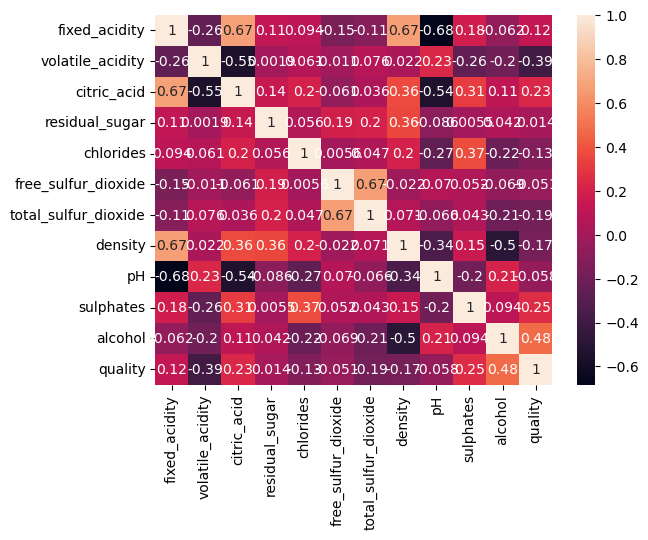

In [35]:
sns.heatmap(df.corr(),annot=True)
df['quality'] = df['quality'].map({3:0,4:0,5:1,6:1,7:2,8:2})
df.shape
print(df['quality'].unique())

In [36]:
y = df['quality']
x = df.drop(columns=['quality'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=0.2)


preprocess=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol'])
    ]
)
pipe=Pipeline([
    ('step',preprocess),
    ('pca',PCA(n_components=0.95)),
    ('model',RandomForestClassifier(
        n_estimators=500, 
        max_depth=20,       
        class_weight='balanced', ))
])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print('Accuracy : ',np.round(accuracy_score(y_test,pred),2)*100,'%')





Accuracy :  90.0 %


In [37]:
# 7.9;0.35; 0.46;3.6;0.078;15;37;0.9973;3.35;0.86;12.8


data={
      'fixed_acidity':7.9,
      'volatile_acidity':0.35,
      'citric_acid':0.46,
      'residual_sugar':3.6,
      'chlorides':0.078,
      'free_sulfur_dioxide':15,
      'total_sulfur_dioxide':37,
      'density':0.9973,
      'pH':3.35,
      'sulphates':0.86,
      'alcohol':12.8
}
df=pd.DataFrame([data])
result=pipe.predict(df)[0]
print('result : ',result)
if result==0:
    print('Bad Quality')
elif(result==1):
    print('Good Quality')
elif result==2:
    print('Execelent Quality')
else :
    print('Problem in input')

result :  2
Execelent Quality


In [38]:
import joblib
joblib.dump(pipe,'WineQualityModel.pkl')


model=joblib.load('WineQualityModel.pkl')

#7.4	0.70	0.00	1.9	0.076	11.0	34.0	0.9978	3.51	0.56	9.4	5
#4	7.4	0.70	0.00	1.9	0.076	11.0	34.0	0.9978	3.51	0.56	9.4	5

data={
      'fixed_acidity':4,
      'volatile_acidity':7.4,
      'citric_acid':0.70,
      'residual_sugar':0.0,
      'chlorides':1.9,
      'free_sulfur_dioxide':0.076,
      'total_sulfur_dioxide':11.0,
      'density':0.9978,
      'pH':3.51,
      'sulphates':0.56,
      'alcohol':9.4
}
df=pd.DataFrame([data])
result=pipe.predict(df)[0]
print('result : ',result)

if result==0:
    print('Bad Quality')
elif(result==1):
    print('Good Quality')
elif result==2:
    print('Execelent Quality')
else :
    print('Problem in input')



result :  1
Good Quality
